# <center>TP1 Computer Vision 2019</center>

# Table of Content
### 1. Basics of image acquisition and representation
1.1. Loading and displaying OpenCV images<br>
1.2. BGR to RGB<br>
1.3. Rectangular ROI (Region Of Interest)<br>
1.4. Basic operations on images<br>

### 2. Low-pass image filtering
2.1 Average filtering<br>
2.2. Uniform blurring<br>
2.2. Gaussian blurring<br>

### 3. High-pass image filtering
3.1. Unsharp filtering<br>
3.2. Image Gradient<br>

### 4. Edge detection
4.1. First order image derivatives<br>
4.2. Second order image derivatives<br>
4.3. Canny algorithm<br>




# 1. Basics of image acquisition and representation
We first import the modules we will need in this notebook.

In [2]:
import numpy as np                     # Numerical algorithms on arrays
import cv2                             # OpenCV
from matplotlib import pyplot as plt   # Plot library
import matplotlib.cm as cm             # Image color map 
import tools                           # A few helpers to plot multiple images

##   1.1. Loading and displaying OpenCV images

You can use the imread function in order to read an image from a specific file path. Let's try to load some images.

In [3]:
# Load a grayscale image
boat = cv2.imread('Images/boat.png')

# Load a color image
plane_color = cv2.imread('Images/airplane.png', cv2.IMREAD_COLOR)

# Load a color image in grayscale format
plane_gray = cv2.imread('Images/airplane.png', cv2.IMREAD_GRAYSCALE)

The format used by OpenCV is the folowing : 

<code>(height, width, channels (if several))</code>

stored in a numpy ndarray with unsigned integers from 0 to 255.

In [5]:
print("Object type in which the image is stored: ", type(plane_color))
print("Shape of the array with a color image: ", plane_color.shape)
print("Shape of the array with a gray image: ", plane_gray.shape)
print("Data type is : ", plane_color.dtype)

Object type in which the image is stored:  <class 'numpy.ndarray'>
Shape of the array with a color image:  (512, 512, 3)
Shape of the array with a gray image:  (512, 512)
Data type is :  uint8


Now that the images are stored in numpy arrays, we can display them using a built-in function of OpenCV.

To keep the image on screen, you need to use the keyboard binding function cv2.waitKey(int). Its argument is the time in milliseconds. The function waits for specified milliseconds for any keyboard event. If you press any key in that time, the program continues. If 0 is passed, it waits indefinitely for a key stroke.

In [5]:
# Display the image
cv2.imshow( 'Grayscale image', boat)
cv2.imshow( 'Color image', plane_color)
cv2.imshow( 'Color image displayed in grayscale', plane_gray)

# Keyboard binding function. 
cv2.waitKey( 0)

# Destroy all the previously opened windows
cv2.destroyAllWindows( )

## 1.2. BGR to RGB

Let us note that the channels are organised as follows with openCV :
* 1 : Blue
* 2 : Green
* 3 : Red

which can be incompatible with other computer vision frameworks that use the usual red, green, blue format. You can however re-arrange the channels as you wish.

In [9]:
b,g,r = cv2.split( plane_color)
plane_rgb = cv2.merge( [r,g,b])

## 1.3. Rectangular ROI (Region Of Interest)

You can select a sub-part of the images using the numpy slicing process.

In [10]:
plane_roi = plane_color[ 128:293,26:508,:]
cv2.imshow( 'Color image', plane_roi)
cv2.waitKey(0)
cv2.destroyAllWindows( )

## 1.4. Basic operations on images

In [11]:
# Load a grayscale image as grayscale and float between 0.0 and 1.0!

cameraman_grey = cv2.imread( 'Images/cameraman.jpg', cv2.IMREAD_GRAYSCALE)
cameraman_grey = cameraman_grey.astype("float")/255

print("Data type is : ", cameraman_grey.dtype)
print("Minimal value is :",  np.min(cameraman_grey))
print("Maximal value is :",  np.max(cameraman_grey))

# Darker image
cameraman_darker = cameraman_grey/2

# Brighter image for certain pixels
cameraman_lighter = np.where( cameraman_grey > 0.5, 1.0, cameraman_grey * 2)


#Concatenate and display the images
frame = np.concatenate((np.concatenate((cameraman_grey, cameraman_darker),axis=1),cameraman_lighter),axis=1)
 
cv2.imshow("Darker and Lighter",frame)
cv2.waitKey(0)
cv2.destroyAllWindows( )


Data type is :  float64
Minimal value is : 0.0
Maximal value is : 1.0


# 2. Low-pass image filtering
## 2.1. Average filtering
The most basic linear filtering is certainly a moving average of the image. This may be achieved with the 'cv2.filter2D' function in OpenCV, which computes the 2D convolution product of an image with a kernel. The function parameters are :
* one input image ('boat'),
* the pixel type of the result image ('-1' tells that the pixel type of the result image should be the same than the pixel type of the input image; 'GRAYSCALE' in our case)
* and one kernel (an uniform kernel; 'ka7').


'tools.multiPlot' is a helper function to plot multiple images whose parameters are:
* the number 'N' and 'M' of lines and columns of the array of image to plot (here N==1 and M==2),
* a tuple or list of the 'NxM' images to plot,
* a tuple or list of the image titles,
* an optional tuple or list of the image color map.

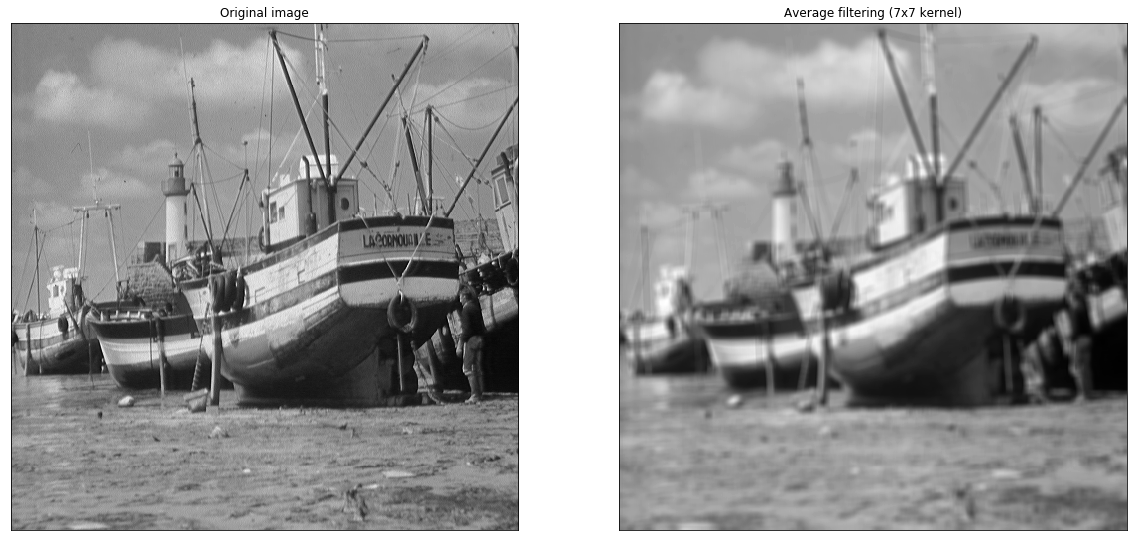

In [12]:
boat = cv2.imread( 'Images/boat.png', cv2.IMREAD_GRAYSCALE)

ka7 = np.ones( ( 7, 7), dtype=float) / 49 # divided by 49 to keep the same average 
# because it will do a convolutional product with a kernel ka7

boat_avg = cv2.filter2D( boat, -1, ka7)

tools.multiPlot( 1, 2, ( boat, boat_avg), ( 'Original image', 'Average filtering (7x7 kernel)'),
                cmap_tuple=( cm.gray, cm.gray))

The 'cv2.filter2D' has also an optional parameter 'borderType' to choose the kind of border conditions you would like to use.

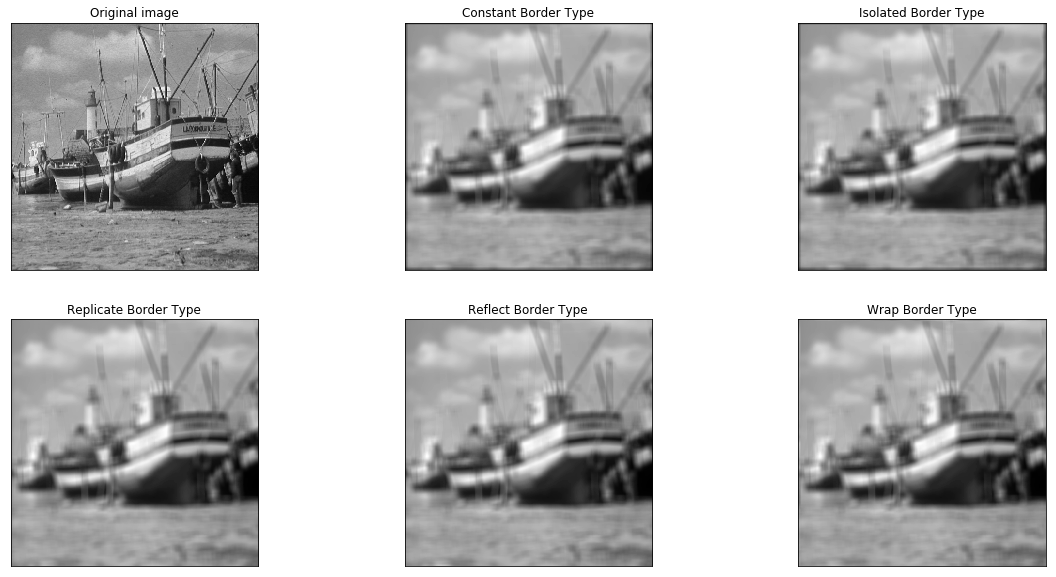

In [13]:
boat = cv2.imread( 'Images/boat.png', cv2.IMREAD_GRAYSCALE)

ka7 = np.ones( ( 15, 15), dtype=float) / 225

# Various border types, image boundaries are denoted with '|'
#
#   BORDER_CONSTANT:      iiiiii|abcdefgh|iiiiiii  with some specified 'i'
#   BORDER_REPLICATE:     aaaaaa|abcdefgh|hhhhhhh
#   BORDER_REFLECT:       fedcba|abcdefgh|hgfedcb
#   BORDER_REFLECT_101:   gfedcb|abcdefgh|gfedcba
#   BORDER_WRAP:          cdefgh|abcdefgh|abcdefg
#
#   BORDER_ISOLATED:      Consider a ROI as an isolated image
#
boat_avg_const = cv2.filter2D( boat, -1, ka7, borderType=cv2.BORDER_CONSTANT)
boat_avg_isol = cv2.filter2D( boat, -1, ka7, borderType=cv2.BORDER_ISOLATED)
boat_avg_replic = cv2.filter2D( boat, -1, ka7, borderType=cv2.BORDER_REPLICATE)
boat_avg_reflec = cv2.filter2D( boat, -1, ka7, borderType=cv2.BORDER_REFLECT)
boat_avg_wrap = cv2.filter2D( boat, -1, ka7, borderType=cv2.BORDER_WRAP)

tools.multiPlot( 2, 3, ( boat, boat_avg_const, boat_avg_isol, boat_avg_replic, boat_avg_reflec, boat_avg_wrap),
                       ( 'Original image', 'Constant Border Type', 'Isolated Border Type',
                         'Replicate Border Type', 'Reflect Border Type', 'Wrap Border Type'),
                       cmap_tuple=( cm.gray, cm.gray, cm.gray, cm.gray, cm.gray, cm.gray))

## 2.2. Uniform blurring

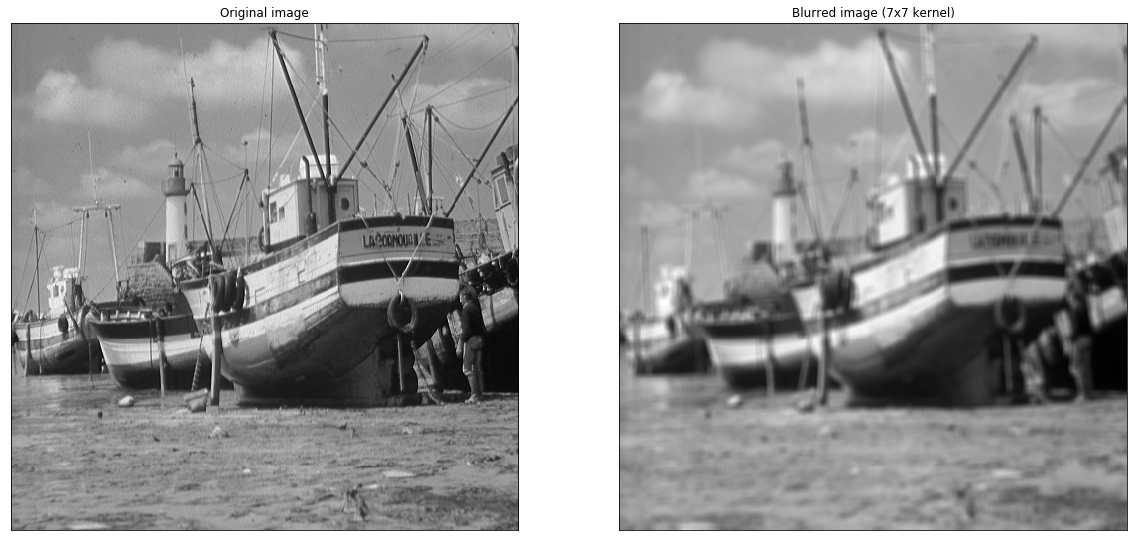

In [14]:
boat = cv2.imread( 'Images/boat.png', cv2.IMREAD_GRAYSCALE)
boat_blur = cv2.blur( boat, ( 7, 7))

tools.multiPlot( 1, 2, ( boat, boat_blur), ( 'Original image', 'Blurred image (7x7 kernel)'),
                       cmap_tuple=( cm.gray, cm.gray))

## 2.3. Gaussian blurring

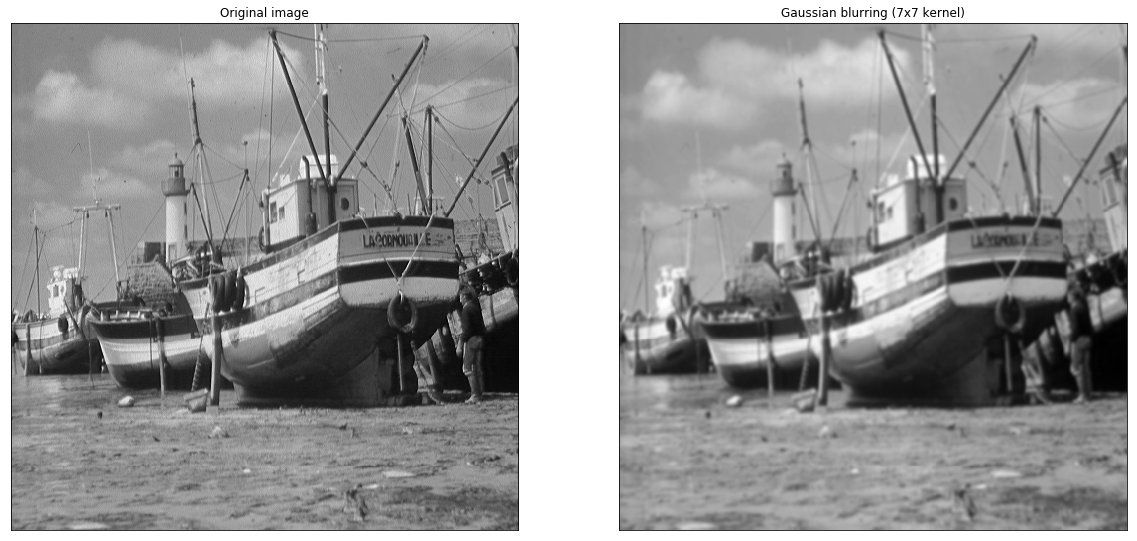

In [15]:
boat = cv2.imread( 'Images/boat.png', cv2.IMREAD_GRAYSCALE)
boat_gauss_blur = cv2.GaussianBlur( boat, ( 7, 7), 0)

tools.multiPlot( 1, 2, ( boat, boat_gauss_blur), ( 'Original image', 'Gaussian blurring (7x7 kernel)'),
                      cmap_tuple=( cm.gray, cm.gray))

# 3. High-Pass filtering

## 3.1. Unsharp filtering
The principle is to remove low frequencies from the image using:

$g(x,y) = f(x,y)-f_{smooth}(x,y)$

In [16]:
from ipywidgets import interact, fixed

boat = cv2.imread( 'Images/boat.png', cv2.IMREAD_GRAYSCALE)

def update( kernel_size=9, strength=3.0):
    boat_avg = cv2.GaussianBlur( boat, ( kernel_size, kernel_size), 0) # The greater the kernel size, 
    # the more nbr of pixels will be taken into account to average one given pixel

    boat_sharp = tools.saturate_cast_uint8( strength * boat - ( strength - 1.0) * boat_avg)

    tools.multiPlot( 1, 2, ( boat, boat_sharp), ( 'Original image', 'Sharpened image'),
                           cmap_tuple=( cm.gray, cm.gray))
    
interact(update, kernel_size = [3, 5, 7, 9, 11, 13, 15, 17, 19] , strength = (1.5, 5.0, 0.5))

interactive(children=(Dropdown(description='kernel_size', index=3, options=(3, 5, 7, 9, 11, 13, 15, 17, 19), v…

<function __main__.update(kernel_size=9, strength=3.0)>

## 3.2. Image gradient
### 3.2.1. The Sobel filter
We compute the first (discrete) derivative of the image in the X direction with the Sobel filter

$$G_{X}^{(I)} (x,y) = K^{SobelX}(x,y) \otimes I(x,y)$$

where

$$K^{SobelX}(x,y)=
     \begin{bmatrix}
      +1 & 0 & -1 \\
      +2 & 0 & -2 \\
      +1 & 0 & -1
     \end{bmatrix} =
     \begin{bmatrix}
      1 \\
      2 \\
      1 
     \end{bmatrix} \otimes
     \begin{bmatrix}
      +1 & 0 & -1
     \end{bmatrix}=\left\{
      \begin{bmatrix}
      1 \\
      1 
     \end{bmatrix} \otimes 
      \begin{bmatrix}
      1 \\
      1 
     \end{bmatrix}\right\} \otimes \left\{
     \begin{bmatrix}
      +1 &  -1
     \end{bmatrix} \otimes 
     \begin{bmatrix}
      1 & 1
     \end{bmatrix} \right\}
$$


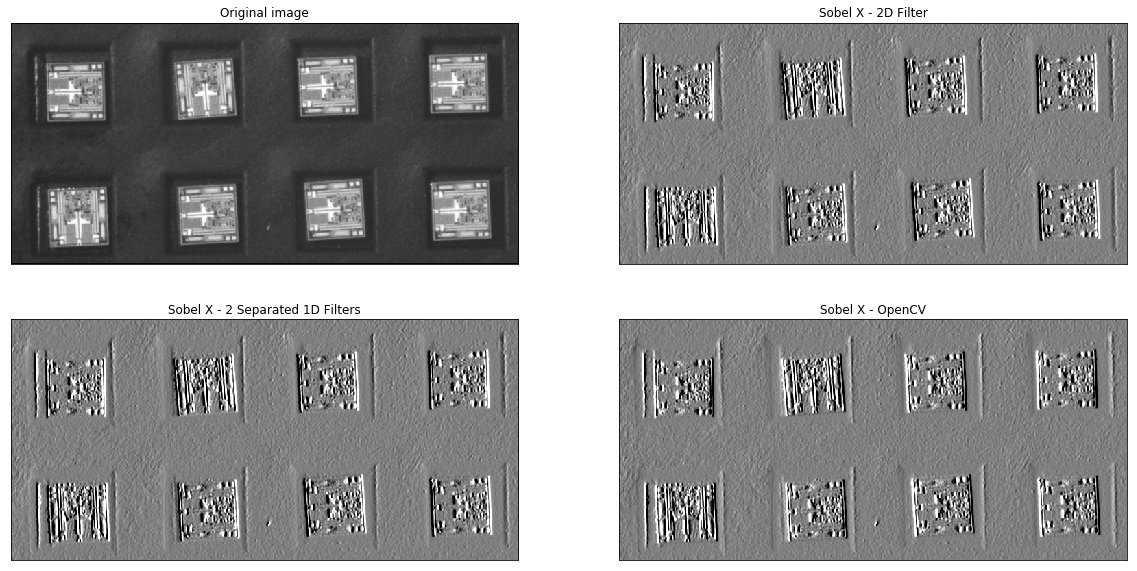

In [17]:
img = cv2.imread( 'Images/Pattern_inspection2.png', cv2.IMREAD_GRAYSCALE)

# 2D filter
K_SobelX = np.array( ( ( 1, 0, -1), (2, 0, -2), (1, 0, -1)), dtype=float)
img_sobelX1 = tools.saturate_cast_uint8( 127.0 + cv2.filter2D( img, cv2.CV_64F, K_SobelX))

# Two 1D filters
K_SobelX_X = np.array( ( 1, 0, -1), dtype=float)
K_SobelX_Y = np.array( ( 1, 2, 1), dtype=float)
img_sobelX2 = tools.saturate_cast_uint8( 127.0 + cv2.sepFilter2D( img, cv2.CV_64F, K_SobelX_X, K_SobelX_Y))

# Predefined Sobel filter
img_sobelX3 = tools.saturate_cast_uint8( 127.0 + cv2.Sobel( img, cv2.CV_32F, 1, 0, ksize=3))

tools.multiPlot( 2, 2, ( img, img_sobelX1, img_sobelX2, img_sobelX3),
                ( 'Original image', 'Sobel X - 2D Filter', 'Sobel X - 2 Separated 1D Filters', 'Sobel X - OpenCV'),
                cmap_tuple=( cm.gray, cm.gray, cm.gray, cm.gray))

# grey color => gradient = 0
# white color => gradient > 0
# dark color => gradient < 0

### 3.2.2. The Scharr's kernel
We may also use the Scharr's kernel instead of the Sobel's kernel for gradient

$$K^{ScharrX}(x,y)=
     \begin{bmatrix}
      +3 & 0 & -3 \\
      +10 & 0 & -10 \\
      +3 & 0 & -3
     \end{bmatrix} =
     \begin{bmatrix}
      3 \\
      10 \\
      3 
     \end{bmatrix} \otimes
     \begin{bmatrix}
      +1 & 0 & -1
     \end{bmatrix}=\left\{
      \begin{bmatrix}
      3 \\
      1 
     \end{bmatrix} \otimes 
      \begin{bmatrix}
      1 \\
      3 
     \end{bmatrix}\right\} \otimes \left\{
     \begin{bmatrix}
      +1 &  -1
     \end{bmatrix} \otimes 
     \begin{bmatrix}
      1 & 1
     \end{bmatrix} \right\}
$$


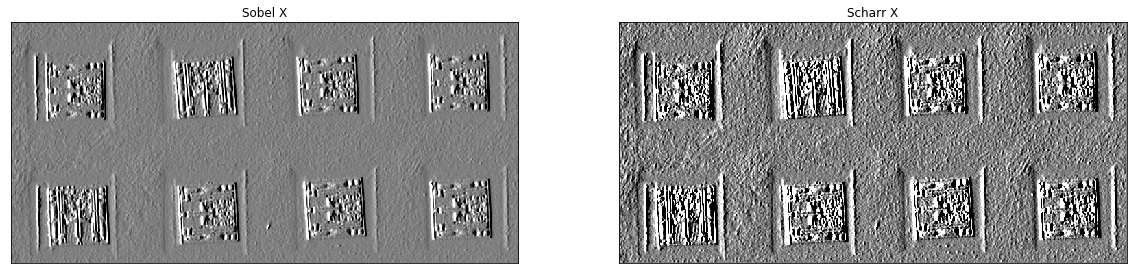

In [18]:
img = cv2.imread( 'Images/Pattern_inspection2.png', cv2.IMREAD_GRAYSCALE)

img_sobelX = tools.saturate_cast_uint8( 127.0 + cv2.Sobel( img, cv2.CV_32F, 1, 0, ksize=3))

K_Scharr_X = np.array( ( ( -3, 0, 3), (-10, 0, 10), (-3, 0, 3)), dtype=float)
img_scharrX = tools.saturate_cast_uint8( 127.0 + cv2.filter2D( img, cv2.CV_64F, K_Scharr_X))

#img_scharrX = tools.saturate_cast_uint8( 127.0 + cv2.Scharr( img, cv2.CV_32F, 1, 0))

tools.multiPlot( 1, 2, ( img_sobelX, img_scharrX),
                ( 'Sobel X', 'Scharr X'),
                cmap_tuple=( cm.gray, cm.gray))

### 3.3.3. Image gradient in Y direction

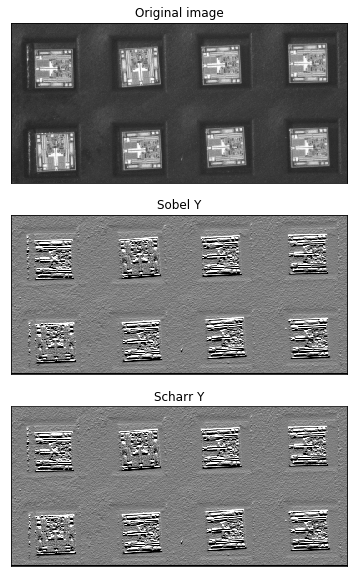

In [19]:
img = cv2.imread( 'Images/Pattern_inspection2.png', cv2.IMREAD_GRAYSCALE)

img_sobelY = tools.saturate_cast_uint8( 127.0 + cv2.Sobel( img, cv2.CV_32F, 0, 1, ksize=3))

img_scharrY = tools.saturate_cast_uint8( 127.0 + cv2.Scharr( img, cv2.CV_32F, 0, 1) / 4.0)

tools.multiPlot( 3, 1, ( img, img_sobelY, img_scharrY),
                ( 'Original image', 'Sobel Y', 'Scharr Y'),
                cmap_tuple=( cm.gray, cm.gray, cm.gray))

# 4. Edge detection
## 4.1. First order image derivatives

/home/roekens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/home/roekens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


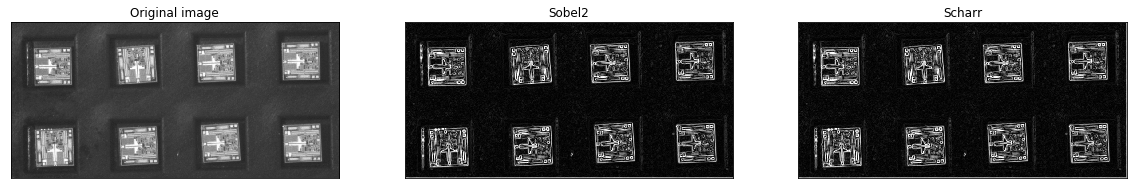

In [20]:
img = cv2.imread( 'Images/Pattern_inspection2.png', cv2.IMREAD_GRAYSCALE)

ksize = 3
img_sobelX = cv2.Sobel( img, cv2.CV_32F, 1, 0, ksize=ksize)
img_sobelY = cv2.Sobel( img, cv2.CV_32F, 0, 1, ksize=ksize)
img_sobel2 = tools.saturate_cast_uint8( np.sqrt( 0.5 * ( img_sobelX * img_sobelX + img_sobelY * img_sobelY)))

img_scharrX = cv2.Scharr( img, cv2.CV_32F, 1, 0) / 4.0
img_scharrY = cv2.Scharr( img, cv2.CV_32F, 0, 1) / 4.0
img_scharr = tools.saturate_cast_uint8( np.sqrt( 0.5 * ( img_scharrX * img_scharrX + img_scharrY * img_scharrY)))

tools.multiPlot( 1, 3, ( img, img_sobel2, img_scharr),
                ( 'Original image', 'Sobel2', 'Scharr'),
                cmap_tuple=( cm.gray, cm.gray, cm.gray))

#img_sobel1 = tools.saturate_cast_uint8( 0.5 * ( np.abs( img_sobelX) + np.abs( img_sobelY)))
#kfact = 1.0 / np.power( 2.0, 2 * ksize - 6)

## 4.2. Second order image derivatives
### 4.2.1. Laplacian

The Laplacian is the sum of the second (discrete) derivatives of the image

$$\Delta I(x,y) = \frac{\partial ^2 I(x,y)} {x^2} + \frac{\partial ^2 I(x,y)} {y^2}. $$

It may be implemented by

$$L^{(I)} (x,y) = K^{Laplacian}(x,y) \otimes I(x,y)$$

where

$$K^{Laplacian}(x,y)=
     \begin{bmatrix}
      0  & -1 &  0 \\
      -1 & +4 & -1 \\
      0  & -1 &  0
     \end{bmatrix} \quad\mathrm{or}\quad
  K^{Laplacian}(x,y)=
     \begin{bmatrix}
      -1 & -1 & -1 \\
      -1 & +8 & -1 \\
      -1 & -1 & -1
     \end{bmatrix}     
$$




/home/roekens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


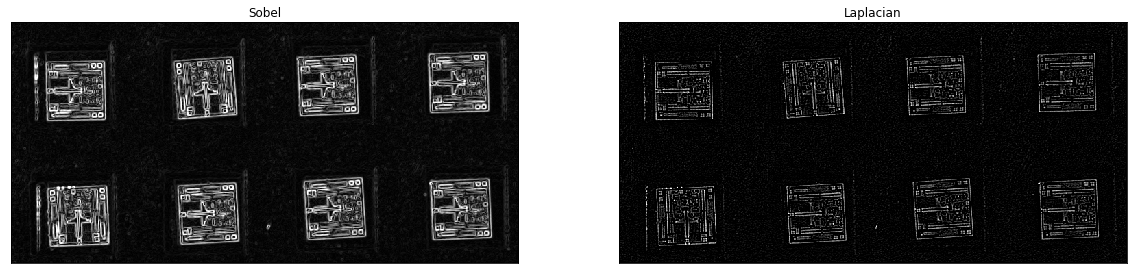

In [21]:
img = cv2.imread( 'Images/Pattern_inspection2.png', cv2.IMREAD_GRAYSCALE)

img_sobelX = cv2.Sobel( img, cv2.CV_32F, 1, 0, ksize=3)
img_sobelY = cv2.Sobel( img, cv2.CV_32F, 0, 1, ksize=3)
img_sobel = tools.saturate_cast_uint8( np.sqrt( 0.5 * ( img_sobelX * img_sobelX + img_sobelY * img_sobelY)))

# 2D filter
K_Laplacian = np.array( ( ( -1, -1, -1), (-1, 8, -1), (-1, -1, -1)), dtype=float)
img_laplacian = tools.saturate_cast_uint8( cv2.filter2D( img, cv2.CV_64F, K_Laplacian))

## With Sobel's filter
#img_sobelX2 = cv2.Sobel( img, cv2.CV_32F, 2, 0, ksize=3)
#img_sobelY2 = cv2.Sobel( img, cv2.CV_32F, 0, 2, ksize=3)
#img_laplacian = tools.saturate_cast_uint8( np.abs( img_sobelX2 + img_sobelY2))

## Predefined Laplacian
# img_laplacian = tools.saturate_cast_uint8( np.abs( cv2.Laplacian( img, cv2.CV_32F)))

tools.multiPlot( 1, 2, ( img_sobel, img_laplacian),
                ( 'Sobel', 'Laplacian'),
                cmap_tuple=( cm.gray, cm.gray))

### 4.2.2. Scale-space representation of an image

We define a continuum of filtered (by a Gaussian) version of the original image by

$$J(x,y;t) = G(x,y;t) \otimes I(x,y) $$

where the Gaussian kernel of variance $t = \sigma ^2$ is given by

$$G(x,y;t) = \frac{1}{2\pi t} exp ( - \frac{x^2+y^2}{2 t} ).$$

### 4.2.3. Laplacian of Gaussian (LoG)

The "Laplacian of Gaussian" (LoG) operator is the Laplacian of a filtered (by a Gaussian) version of the image

$$LoG_t\{ I(x,y) \} = \Delta \{ J(x,y;t) \} =  \Delta \{ G(x,y;t) \otimes I(x,y) \}$$

Due to the distributivity properties of the differentiation of a convolution product, we have

$$LoG_t\{ I(x,y) \} = G(x,y;t) \otimes \Delta \{ I(x,y) \} = \Delta \{ G(x,y;t) \} \otimes I(x,y). $$

And we have the following relation between the Laplacian of a Gaussian and its derivative relatively to the parameter $t$

$$\Delta \{ G(x,y;t) \} =  \frac{1}{2\pi t^3} [ x^2+y^2-2t] exp ( - \frac{x^2+y^2}{2 t} ) = 2 \frac {\partial G(x,y;t)} {\partial t}.$$

So

$$LoG_t\{ I(x,y) \} = \Delta \{ J(x,y;t) \} = 2 \frac {\partial J(x,y;t)} {\partial t}$$

### 4.2.4. Difference of Gaussian (DoG)
We may approximate the LoG operator by the Difference of Gaussian (DoG) operator

$$\Delta \{ J(x,y;\sigma) \} \approx \frac { 1.6 [J(x,y;1.6 \sigma) - J(x,y;\sigma)]} {\sigma ^2}$$






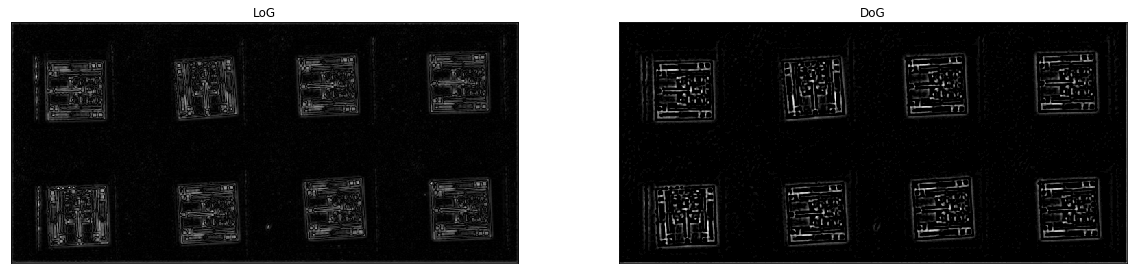

In [22]:
# sigma = 0.3 * ( ( ksize - 1) * 0.5 - 1) + 0.8
img_float = img.astype( float)
ksize = 5
sigma = 0.3 * ( ( ksize - 1) * 0.5 - 1) + 0.8     # ksize = 5 --> sigma = 1.1

# LoG
img_gauss_blur = cv2.GaussianBlur( img_float, (0,0), sigma)

kfact = 1.0 / np.power( 2.0, 2 * ( ksize - 2) - 6)
img_Gauss_X2 = kfact * cv2.Sobel( img_gauss_blur, cv2.CV_64F, 2, 0, ksize=ksize-2)
img_Gauss_Y2 = kfact * cv2.Sobel( img_gauss_blur, cv2.CV_64F, 0, 2, ksize=ksize-2)

img_LoG = tools.saturate_cast_uint8( np.abs( img_Gauss_X2 + img_Gauss_Y2))

#DoG
sigma1 = sigma
img_gauss_blur_1 = cv2.GaussianBlur( img_float, (0,0), sigma1)

sigma2 = sigma1 * 1.6 # sigma2 = 1.1 * 1.6 = 1.76
img_gauss_blur_2 = cv2.GaussianBlur( img_float, ( 0, 0), sigma2, sigma2)

img_DoG = tools.saturate_cast_uint8( ( 1.6 * ( img_gauss_blur_2 - img_gauss_blur_1) / ( sigma1 * sigma1)))

tools.multiPlot( 1, 2, ( img_LoG, img_DoG),
                ( 'LoG', 'DoG'),
                cmap_tuple=( cm.gray, cm.gray))

## 4.3. Canny algorithm

In [23]:
from ipywidgets import interact, fixed

img = cv2.imread( 'Images/Pattern_inspection2.png', cv2.IMREAD_GRAYSCALE)

def update( lo_thresh=80, hi_thresh=180, sobel_size=3):
    img_canny = cv2.Canny( img, lo_thresh, hi_thresh, apertureSize=sobel_size, L2gradient=True)

    tools.multiPlot( 1, 2, ( img, img_canny),
                     ( 'Original image', 'Canny'),
                     cmap_tuple=( cm.gray, cm.gray))

interact(update, lo_thresh = (10, 150, 10), hi_thresh = (120, 240, 10), sobel_size= [3, 5, 7])

interactive(children=(IntSlider(value=80, description='lo_thresh', max=150, min=10, step=10), IntSlider(value=…

<function __main__.update(lo_thresh=80, hi_thresh=180, sobel_size=3)>